## KNN using K-MEANS 
Showing the effect of k on the accuracy of the algorithm

### Import libs

In [119]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [120]:
dataset = load_wine()
scaler = MinMaxScaler() 

X = dataset.data
X = scaler.fit_transform(X)
# y = dataset.target

### Find optimal K using Elbow Method
we calculate WCSS ( Within-Cluster Sum of Squares ) for each k, and find the optimal K <br/>

In [121]:
wcss = []
k_values = range(1, 12,2)

for i in k_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

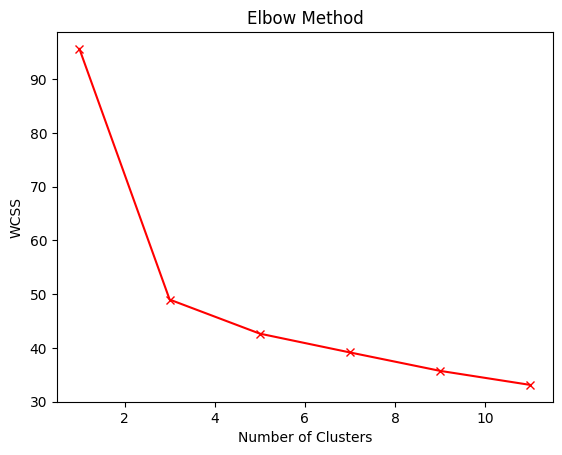

In [122]:
plt.plot(k_values, wcss, marker='x', color="r")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### K-MEANS and KNN 
test the knn algorithm with different k in clustering.

In [123]:
k_values = range(1, 12,2)
accuracy_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(X) 

    X_train, X_test, y_train, y_test = train_test_split(X, clusters, test_size=0.2)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

results = pd.DataFrame({'K in K-Means': k_values, 'KNN Accuracy': accuracy_scores})
print(results)

   K in K-Means  KNN Accuracy
0             1      1.000000
1             3      0.944444
2             5      0.888889
3             7      0.805556
4             9      0.805556
5            11      0.833333


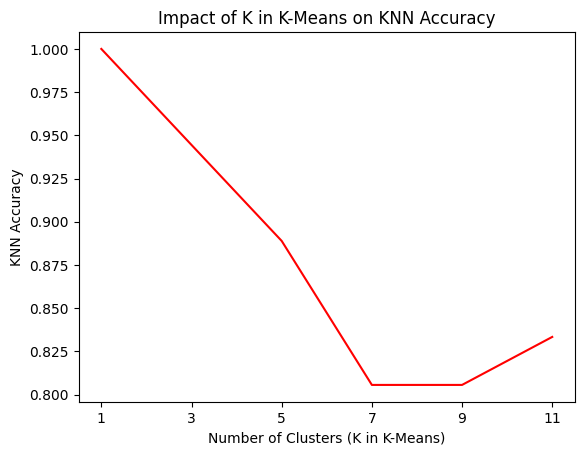

In [124]:
plt.plot(k_values, accuracy_scores, linestyle='-', color='r')
plt.xlabel('Number of Clusters (K in K-Means)')
plt.ylabel('KNN Accuracy')
plt.title('Impact of K in K-Means on KNN Accuracy')
plt.xticks(k_values)
plt.show()